In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Carregar o conjunto de dados
df = pd.read_csv('dados_municipios_pib_2020_pc_votacao_vencedor_idh.csv')

data = df[['porcentagem_votos_bolsonaro_2022', '% PIB composto por Agropecuária', '% PIB composto por Indústria', '% PIB composto por Serviços', '% PIB composto por Serv Públicos']]

data = data.rename(columns={'% PIB composto por Agropecuária': 'percent_pib_agro'})
data = data.rename(columns={'% PIB composto por Indústria': 'percent_pib_ind'})
data = data.rename(columns={'% PIB composto por Serviços': 'percent_pib_serv'})
data = data.rename(columns={'% PIB composto por Serv Públicos': 'percent_pib_serv_pub'})

data

porcentagem_votos_bolsonaro_2022  percent_pib_agro  percent_pib_ind  \
0                               0.7846            0.2528         0.053144   
1                               0.5891            0.1675         0.033987   
2                               0.7079            0.1430         0.080099   
3                               0.7056            0.3728         0.031994   
4                               0.7258            0.1965         0.023493   
...                                ...               ...              ...   
5559                            0.3257            0.0350         0.101153   
5560                            0.4107            0.6441         0.024686   
5561                            0.3219            0.2168         0.030002   
5562                            0.3964            0.1088         0.088862   
5563                            0.5040            0.0786         0.364684   

      percent_pib_serv  percent_pib_serv_pub  
0             0.271031              0.351601  
1             0.168634              0.603787  
2             0.293871              0.380537  
3             0.163058              0.401528  
4             0.156780              0.593285  
...                ...                   ...  
5559          0.331379              0.435628  
5560          0.117336              0.192800  
5561          0.130392              0.597284  
5562          0.235613              0.492399  
5563          0.222697              0.253442  

[5564 rows x 5 columns]

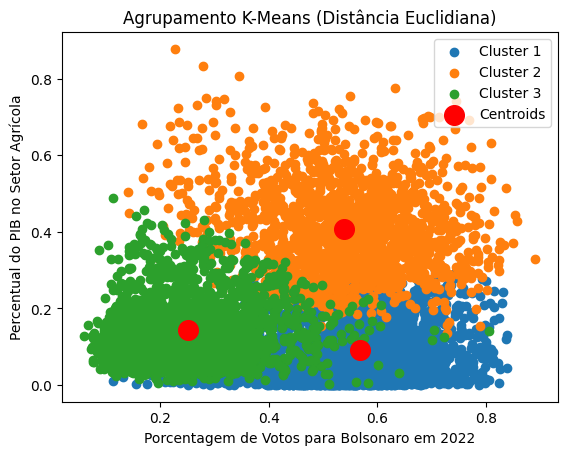

         porcentagem_votos_bolsonaro_2022  percent_pib_agro  percent_pib_ind  \
cluster                                                                        
0                                0.568004          0.091717         0.235294   
1                                0.538546          0.406253         0.072417   
2                                0.252629          0.142562         0.063643   

         percent_pib_serv  percent_pib_serv_pub  
cluster                                          
0                0.390843              0.179645  
1                0.246704              0.222063  
2                0.265344              0.478662  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados_municipios_pib_2020_pc_votacao_vencedor_idh.csv')

data = df[['porcentagem_votos_bolsonaro_2022', '% PIB composto por Agropecuária', '% PIB composto por Indústria', '% PIB composto por Serviços', '% PIB composto por Serv Públicos']]

data = data.rename(columns={'% PIB composto por Agropecuária': 'percent_pib_agro'})
data = data.rename(columns={'% PIB composto por Indústria': 'percent_pib_ind'})
data = data.rename(columns={'% PIB composto por Serviços': 'percent_pib_serv'})
data = data.rename(columns={'% PIB composto por Serv Públicos': 'percent_pib_serv_pub'})

# Selecionar as variáveis relevantes
X = data[['porcentagem_votos_bolsonaro_2022', 'percent_pib_agro', 'percent_pib_ind', 'percent_pib_serv', 'percent_pib_serv_pub']]

# Escolher o número de clusters (K)
k = 3

# Inicializar os centroides aleatoriamente
np.random.seed(0)
centroids = X.sample(k).values

# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Função para atribuir cada ponto ao cluster mais próximo
def assign_clusters(X, centroids):
    clusters = []
    for point in X.values:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Função para atualizar os centroides com base na média dos pontos do cluster
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# Executar o algoritmo K-Means
max_iterations = 100
for iteration in range(max_iterations):
    old_centroids = centroids
    clusters = assign_clusters(X, centroids)
    centroids = update_centroids(X, clusters, k)
    if np.all(old_centroids == centroids):
        break

# Adicionar os rótulos de cluster de volta ao DataFrame original
data['cluster'] = clusters

# Visualizar os clusters
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['porcentagem_votos_bolsonaro_2022'], cluster_data['percent_pib_agro'], label=f'Cluster {cluster + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Porcentagem de Votos para Bolsonaro em 2022')
plt.ylabel('Percentual do PIB no Setor Agrícola')
plt.title('Agrupamento K-Means (Distância Euclidiana)')
plt.legend()
plt.show()

# Exibir informações sobre os clusters
cluster_info = data.groupby('cluster').mean()
print(cluster_info)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('dados_municipios_pib_2020_pc_votacao_vencedor_idh.csv')

data = df[['porcentagem_votos_bolsonaro_2022', '% PIB composto por Agropecuária', '% PIB composto por Indústria', '% PIB composto por Serviços', '% PIB composto por Serv Públicos']]

data = data.rename(columns={'% PIB composto por Agropecuária': 'percent_pib_agro'})
data = data.rename(columns={'% PIB composto por Indústria': 'percent_pib_ind'})
data = data.rename(columns={'% PIB composto por Serviços': 'percent_pib_serv'})
data = data.rename(columns={'% PIB composto por Serv Públicos': 'percent_pib_serv_pub'})

# Selecionar as variáveis relevantes
X = data[['porcentagem_votos_bolsonaro_2022', 'percent_pib_agro', 'percent_pib_ind', 'percent_pib_serv', 'percent_pib_serv_pub']]

# Escolher o número de clusters (K)
k = 4  # Você pode ajustar o número de clusters conforme necessário

# Criar e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
data['cluster'] = kmeans.labels_

# Visualizar os clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['porcentagem_votos_bolsonaro_2022'], cluster_data['percent_pib_agro'], c=colors[cluster], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.xlabel('Porcentagem de Votos para Bolsonaro em 2022')
plt.ylabel('Percentual do PIB no Setor Agrícola')
plt.title('Agrupamento K-Means (Distância Euclidiana)')
plt.legend()
plt.show()

# Exibir informações sobre os clusters
cluster_info = data.groupby('cluster').mean()
print(cluster_info)

C:\Users\felip\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         porcentagem_votos_bolsonaro_2022  percent_pib_agro  percent_pib_ind  \
cluster                                                                        
0                                0.249240          0.144027         0.060756   
1                                0.536874          0.420559         0.069564   
2                                0.513359          0.084739         0.436370   
3                                0.578979          0.107698         0.151410   

         percent_pib_serv  percent_pib_serv_pub  
cluster                                          
0                0.263542              0.482345  
1                0.239687              0.218688  
2                0.250107              0.132688  
3                0.431783              0.209052  


C:\Users\felip\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


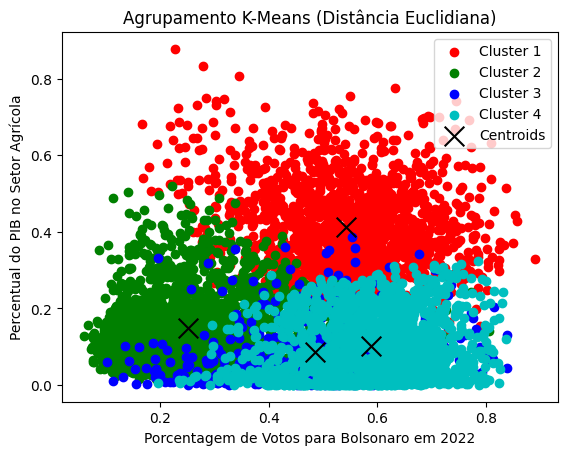

         porcentagem_votos_bolsonaro_2022  percent_pib_agro  percent_pib_ind  \
cluster                                                                        
0                                0.541586          0.412718         0.070389   
1                                0.251572          0.148386         0.061996   
2                                0.485897          0.085707         0.462299   
3                                0.587776          0.102366         0.166566   

         percent_pib_serv  percent_pib_serv_pub      idhm    idhm_e    idhm_r  
cluster                                                                        
0                0.244222              0.219824  0.679129  0.571887  0.673011  
1                0.262642              0.477557  0.590413  0.483206  0.562554  
2                0.230303              0.132522  0.688169  0.592585  0.673802  
3                0.430169              0.198066  0.725446  0.640810  0.714563  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('dados_municipios_pib_2020_pc_votacao_vencedor_idh.csv')

data = df[['porcentagem_votos_bolsonaro_2022', '% PIB composto por Agropecuária', '% PIB composto por Indústria', '% PIB composto por Serviços', '% PIB composto por Serv Públicos', 'idhm', 'idhm_e', 'idhm_r']]

data = data.rename(columns={'% PIB composto por Agropecuária': 'percent_pib_agro'})
data = data.rename(columns={'% PIB composto por Indústria': 'percent_pib_ind'})
data = data.rename(columns={'% PIB composto por Serviços': 'percent_pib_serv'})
data = data.rename(columns={'% PIB composto por Serv Públicos': 'percent_pib_serv_pub'})

# Selecionar as variáveis relevantes
X = data[['porcentagem_votos_bolsonaro_2022', 'percent_pib_agro', 'percent_pib_ind', 'percent_pib_serv', 'percent_pib_serv_pub', 'idhm', 'idhm_e', 'idhm_r']]

# Escolher o número de clusters (K)
k = 4  # Você pode ajustar o número de clusters conforme necessário

# Criar e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
data['cluster'] = kmeans.labels_

# Visualizar os clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['porcentagem_votos_bolsonaro_2022'], cluster_data['percent_pib_agro'], c=colors[cluster], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.xlabel('Porcentagem de Votos para Bolsonaro em 2022')
plt.ylabel('Percentual do PIB no Setor Agrícola')
plt.title('Agrupamento K-Means (Distância Euclidiana)')
plt.legend()
plt.show()

# Exibir informações sobre os clusters
cluster_info = data.groupby('cluster').mean()
print(cluster_info)